In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score 

In [2]:
df = pd.read_csv(r"C:\Users\dell\Sales Data trends and outlier detection\train.csv")

In [3]:

df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [4]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [8]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
X = df[['Sales', 'Year', 'Month']].values

In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Year              0
Month             0
dtype: int64

In [10]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)

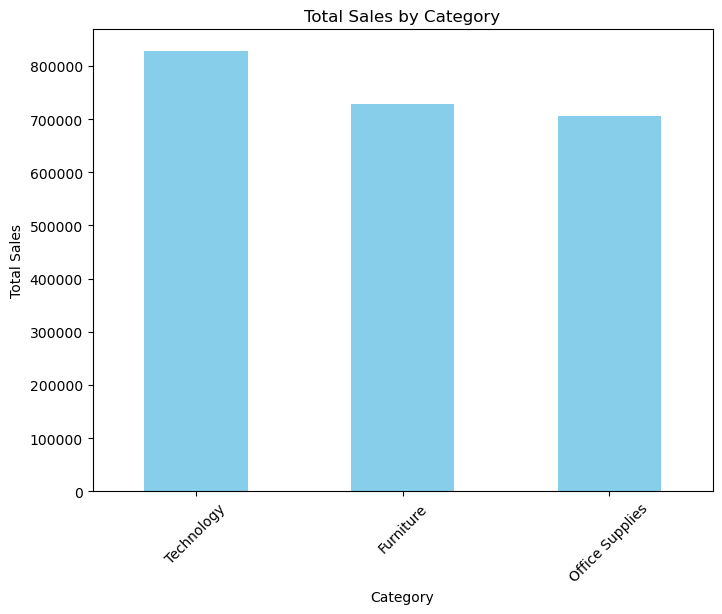

In [11]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

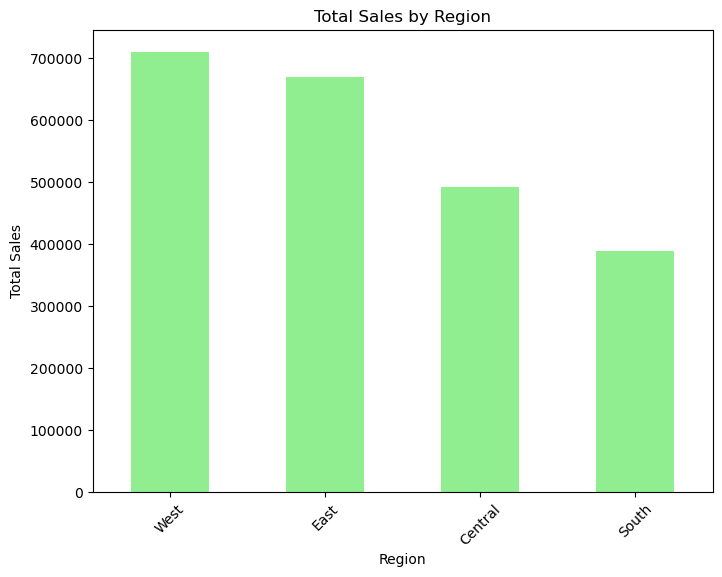

In [12]:
# Total Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

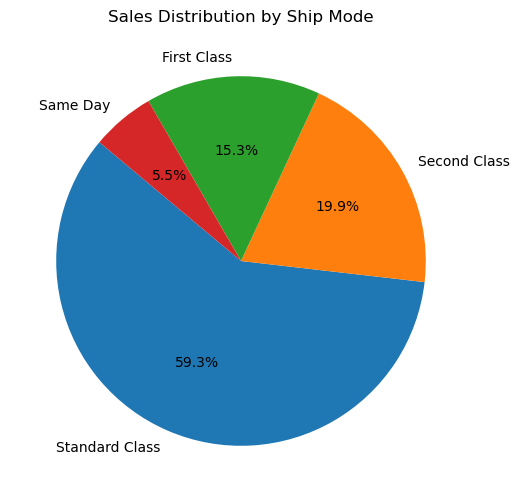

In [13]:
#  Sales Distribution by Ship Mode
plt.figure(figsize=(8, 6))
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
ship_mode_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Ship Mode')
plt.ylabel('')
plt.show()

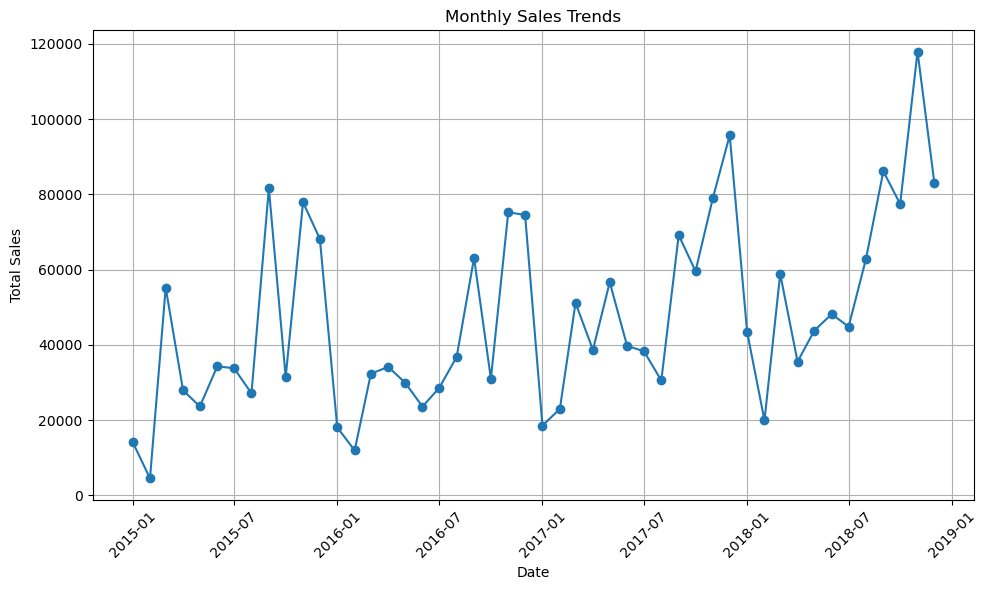

In [14]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
monthly_sales = monthly_sales.reset_index()

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

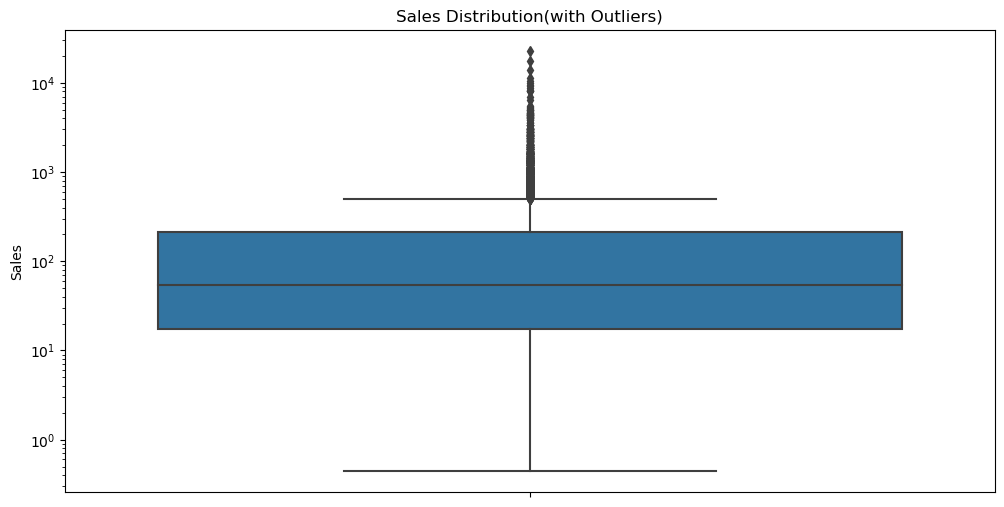

In [15]:
# Visualize outliers 
plt.figure(figsize=(12, 6))
sns.boxplot( y='Sales', data=df)
plt.title('Sales Distribution(with Outliers)')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

In [16]:
# Apply log transform
df['Log_Sales'] = np.log(df['Sales'])

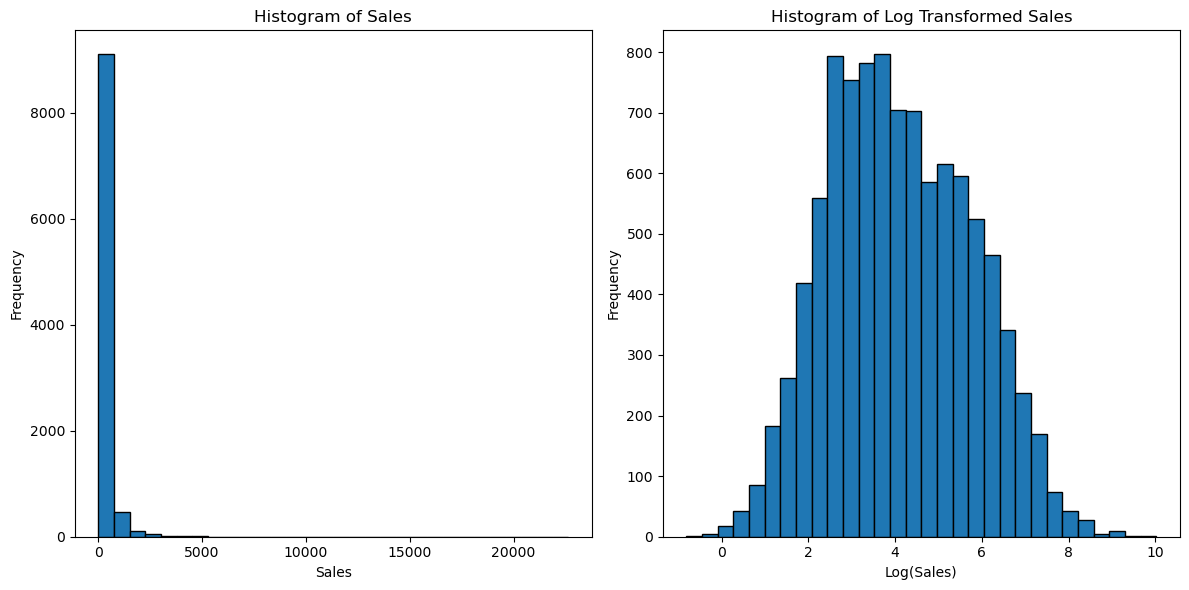

In [17]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of original Sales data
axes[0].hist(df['Sales'], bins=30, edgecolor='black')
axes[0].set_title('Histogram of Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Histogram of log-transformed Sales data
axes[1].hist(df['Log_Sales'], bins=30, edgecolor='black')
axes[1].set_title('Histogram of Log Transformed Sales')
axes[1].set_xlabel('Log(Sales)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

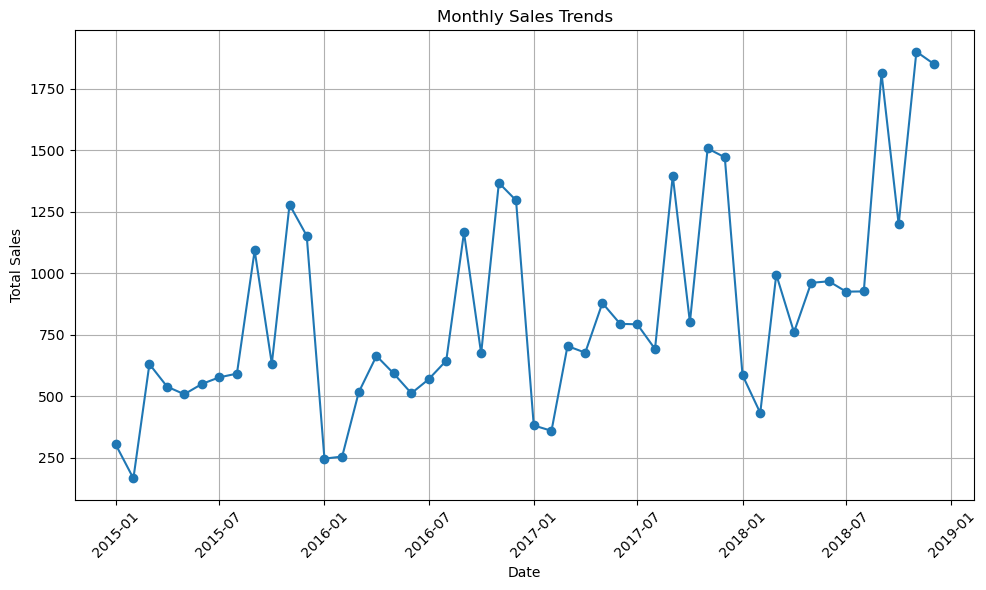

In [18]:
# Plot monthly sales trends
monthly_sales = df.groupby(['Year', 'Month'])['Log_Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Log_Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Log_Sales'].quantile(0.25)
Q3 = df['Log_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [20]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Log_Sales'] < lower_bound) | (df['Log_Sales'] > upper_bound)]

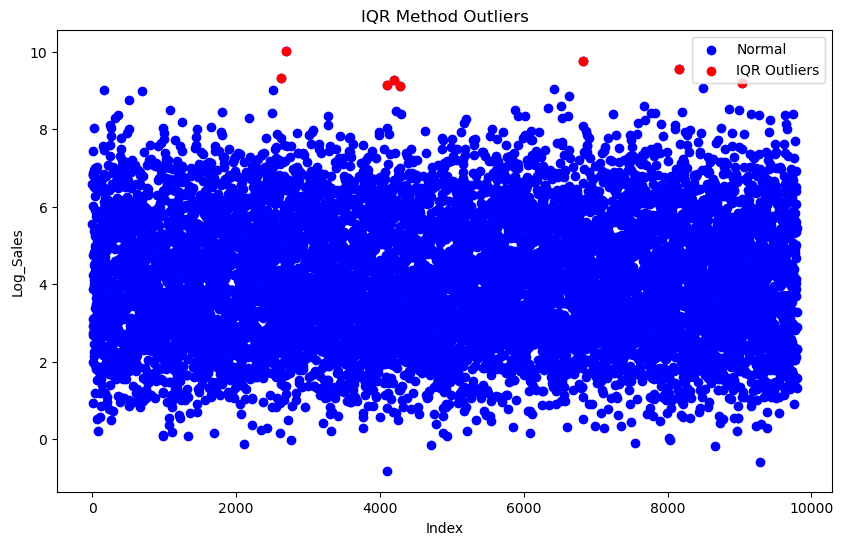

In [21]:
# Plot IQR Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Log_Sales'], color='blue', label='Normal')
plt.scatter(iqr_outliers.index, iqr_outliers['Log_Sales'], color='red', label='IQR Outliers')
plt.xlabel('Index')
plt.ylabel('Log_Sales')
plt.legend()
plt.title('IQR Method Outliers')
plt.show()

In [22]:

iqr_outliers.to_csv('iqr_outliers.csv', index=False)

In [23]:

df['z_score'] = stats.zscore(df['Log_Sales'])
z_threshold = 3
zscore_outliers = df[np.abs(df['z_score']) > z_threshold]

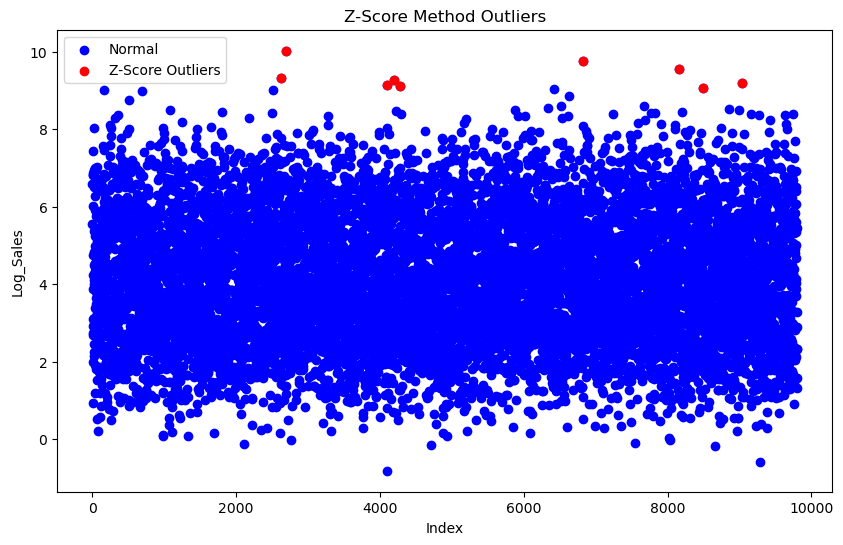

In [24]:
# Plot Z-Score Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Log_Sales'], color='blue', label='Normal')
plt.scatter(zscore_outliers.index, zscore_outliers['Log_Sales'], color='red', label='Z-Score Outliers')
plt.xlabel('Index')
plt.ylabel('Log_Sales')
plt.legend()
plt.title('Z-Score Method Outliers')
plt.show()

In [25]:
# Save Z-Score outliers to CSV
zscore_outliers.to_csv('zscore_outliers.csv', index=False)

In [26]:
# Isolation Forest Method
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['iso_anomaly'] = iso_forest.fit_predict(df[['Log_Sales']])
iso_outliers = df[df['iso_anomaly'] == -1]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


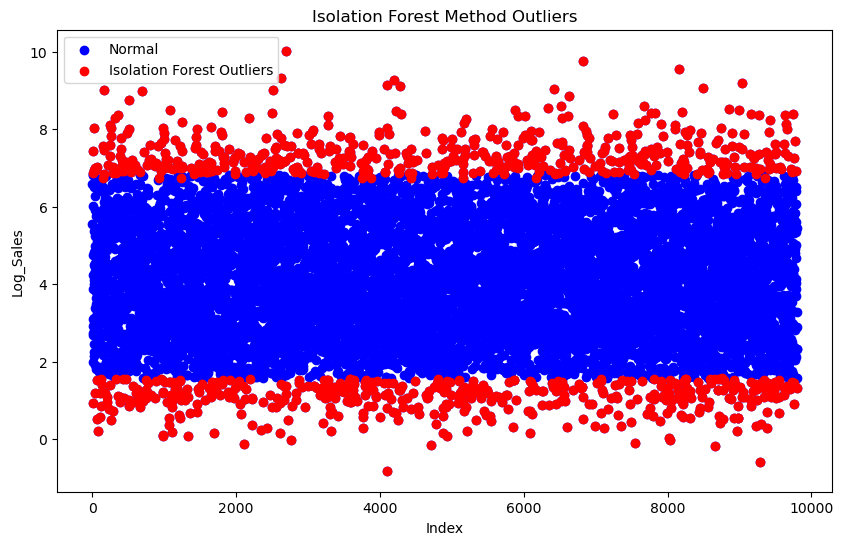

In [27]:
# Plot Isolation Forest Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Log_Sales'], color='blue', label='Normal')
plt.scatter(iso_outliers.index, iso_outliers['Log_Sales'], color='red', label='Isolation Forest Outliers')
plt.xlabel('Index')
plt.ylabel('Log_Sales')
plt.legend()
plt.title('Isolation Forest Method Outliers')
plt.show()

In [28]:
# Save Isolation Forest outliers to CSV
iso_outliers.to_csv('iso_forest_outliers.csv', index=False)

In [29]:
# Local Outlier Factor (LOF) Method
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['lof_anomaly'] = lof.fit_predict(df[['Log_Sales']])
lof_outliers = df[df['lof_anomaly'] == -1]

In [30]:
print("Local Outlier Factor Method Outliers:")
print(lof_outliers)

Local Outlier Factor Method Outliers:
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
7          8  CA-2015-115812 2015-06-09 2015-06-14  Standard Class   
11        12  CA-2015-115812 2015-06-09 2015-06-14  Standard Class   
21        22  CA-2017-137330 2017-12-09 2017-12-13  Standard Class   
22        23  CA-2017-137330 2017-12-09 2017-12-13  Standard Class   
...      ...             ...        ...        ...             ...   
9729    9730  CA-2015-111962 2015-09-29 2015-10-04  Standard Class   
9754    9755  CA-2018-113705 2018-03-27 2018-03-29    Second Class   
9763    9764  CA-2015-121762 2015-02-14 2015-02-18  Standard Class   
9771    9772  CA-2017-123533 2017-11-24 2017-11-30  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     Customer ID        Customer Name      Segment        Country  \
1       CG-12520          Claire Gute     Consumer  

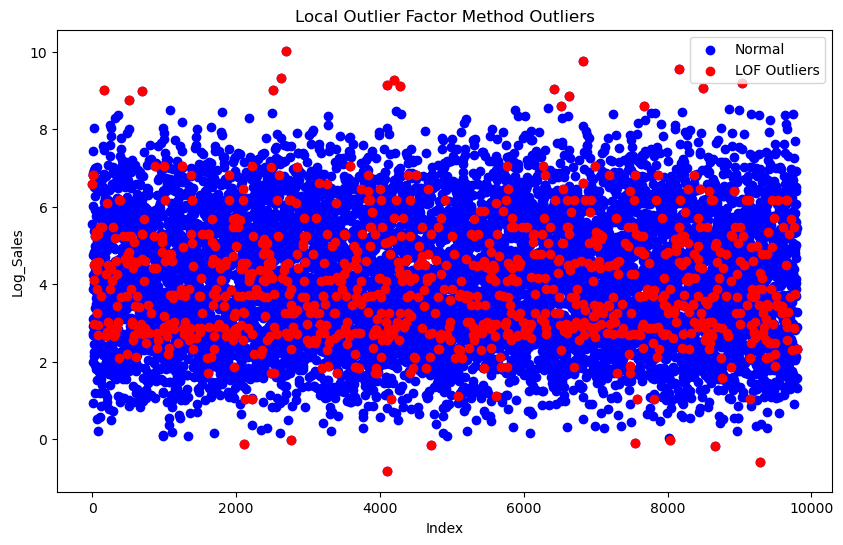

In [31]:
# Plot LOF Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Log_Sales'], color='blue', label='Normal')
plt.scatter(lof_outliers.index, lof_outliers['Log_Sales'], color='red', label='LOF Outliers')
plt.xlabel('Index')
plt.ylabel('Log_Sales')
plt.legend()
plt.title('Local Outlier Factor Method Outliers')
plt.show()

In [32]:
# Save LOF outliers to CSV
lof_outliers.to_csv('lof_outliers.csv', index=False)

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
# Initialize kNN
k = 20  # Number of neighbors to consider (you can adjust this parameter)
knn = NearestNeighbors(n_neighbors=k)
knn.fit(df[['Log_Sales']])

NearestNeighbors(n_neighbors=20)

In [35]:
# Compute distances to k-nearest neighbors
distances, indices = knn.kneighbors(df[['Log_Sales']])
# Use the distance to the k-th nearest neighbor as outlier score
df['knn_distance'] = distances[:, -1]

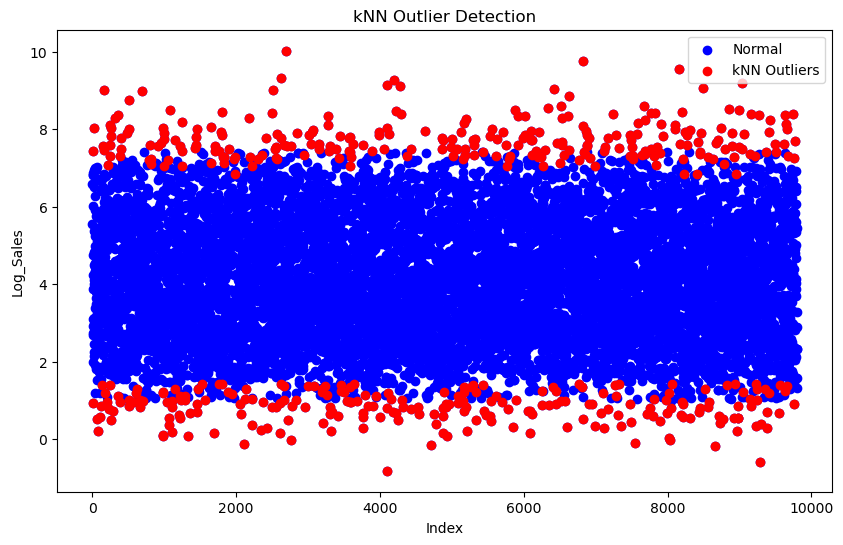

In [36]:
# Set a threshold for outlier detection (you can adjust this based on your data)
knn_threshold = np.percentile(df['knn_distance'], 95)  # Example: 95th percentile
# Identify outliers
knn_outliers = df[df['knn_distance'] > knn_threshold]
# Plot kNN Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Log_Sales'], color='blue', label='Normal')
plt.scatter(knn_outliers.index, knn_outliers['Log_Sales'], color='red', label='kNN Outliers')
plt.xlabel('Index')
plt.ylabel('Log_Sales')
plt.legend()
plt.title('kNN Outlier Detection')
plt.show()

# Save kNN outliers to CSV
knn_outliers.to_csv('knn_outliers.csv', index=False)

In [37]:
# Isolation Forest Method
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['iso_anomaly'] = iso_forest.fit_predict(df[['Sales']])
df_clean = df[df['iso_anomaly'] == -1]
# Visualize monthly sales trends with and without outliers
monthly_sales_clean = df_clean.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales_clean['Date'] = pd.to_datetime(monthly_sales_clean[['Year', 'Month']].assign(day=1))
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


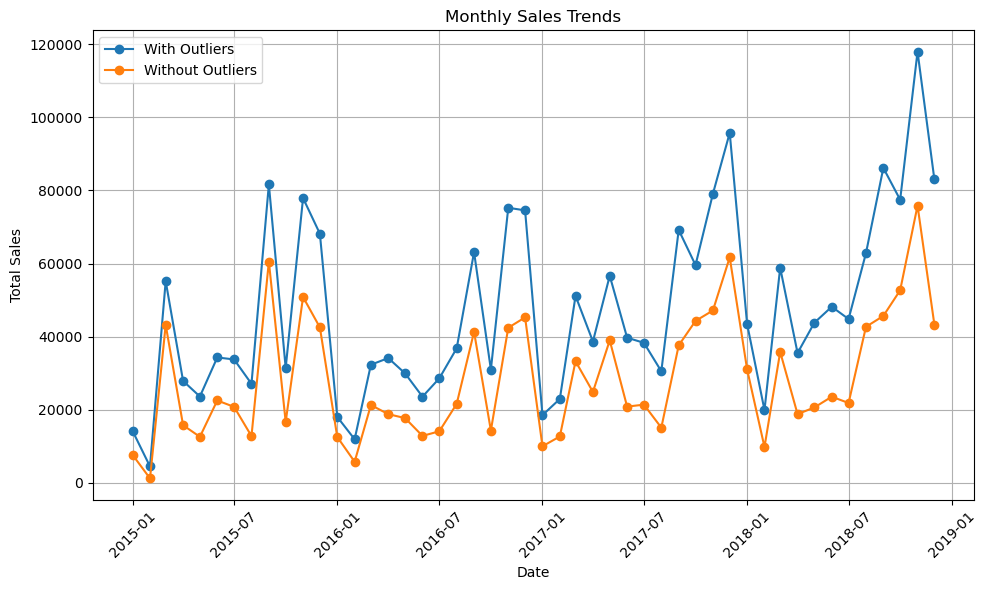

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linestyle='-', label='With Outliers')
plt.plot(monthly_sales_clean['Date'], monthly_sales_clean['Sales'], marker='o', linestyle='-', label='Without Outliers')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

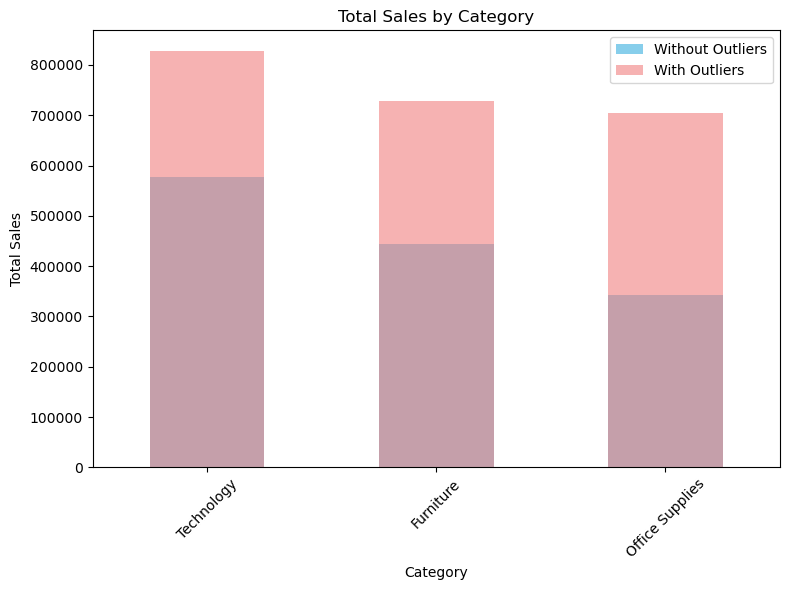

In [39]:
# Compare total sales by category with and without outliers
plt.figure(figsize=(8, 6))
category_sales_clean = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales_clean.plot(kind='bar', color='skyblue', label='Without Outliers')
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='lightcoral', alpha=0.6, label='With Outliers')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

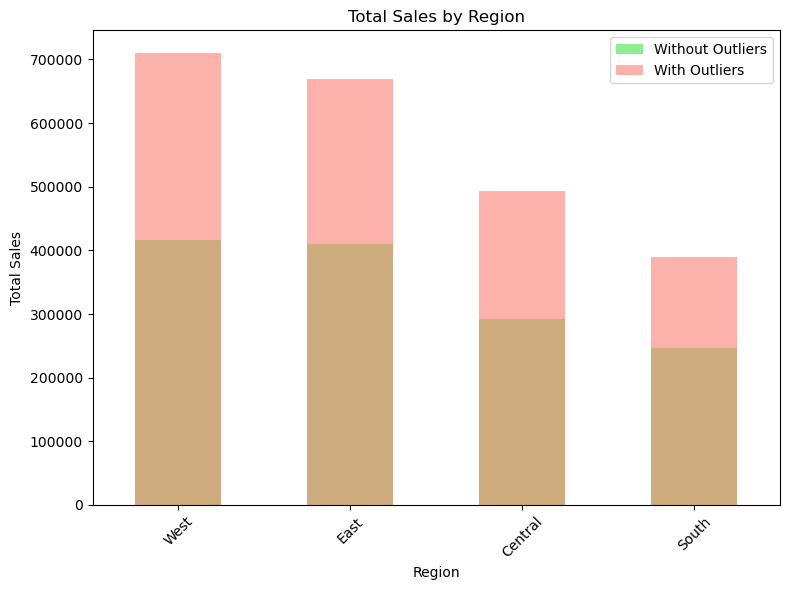

In [40]:
# Compare total sales by region with and without outliers
plt.figure(figsize=(8, 6))
region_sales_clean = df_clean.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales_clean.plot(kind='bar', color='lightgreen', label='Without Outliers')
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='salmon', alpha=0.6, label='With Outliers')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()